# 14. 알고리즘 (Model)

- 최적화 (Optimization) : 문제상황에서 여러 해결 방안 중 최적의 해결 방안을 찾는 방법
- 기본적으로 머신러닝(기계학습)에서 데이터로부터 학습을 통해 수식화를 진행할 때 (Modeling), 목표값 Y를 잘 예측/분류하는 수식을 만드는 과정 (fitting)

- 수학적 접근 : 특정 함수의 값을 최대화(또는 최소화)하는 최적의 수식(파라미터, 가중치, Weight)의 조합을 찾는 문제

    - **최소화 (Minimization)** : 함수 목표값(Y)의 값이 최소가 되게끔 파라미터(Weight, 회귀계수)를 찾는 문제
      - Y -> 오류 / 오차 / 비용 / 손실 ...
     
    - 최대화 (Maximization) : 함수 목표값(Y)의 값이 최대가 되게끔 파라미터를 찾는 문제
 
      - Y -> 이윤 / 점수 / 성능 ...
- 머신러닝에서 Model(수식)을 구성할 때, 데이터 상의 실제값과 모델이 예측한 (분류/회귀)값의 차이(오차)가 최소가 되는 방향으로 모델을 구성

- 최적화 기법 종류 :
  - Least Square Method (최소제곱법 - 회귀분석 최적화 기법)
  - Gradient Descent Method (경사 하강법 - 회귀분석 최적화 기법)
  - Newton's Method
  - Gaussian Method
  - Bayesian Method
  - Markov Batesian Method

## 14-1. 알고리즘 최적화 기법
### 최소제곱법 (Least Square Method)
- 회귀분석에서 사용되는 최적화 기법
- 데이터를 대표하는 회귀선을 찾을 때, 회귀선이 예측한 예측값과 데이터의 실제값의 차이 (잔차/오차 Residual, Error) 제곱의 합 또는 평균이 최소화(Minimization)되는 방향으로 파라미터를 결정하는 방법
- 실제값 - 예측값 = 0 / 예측값 = a X + b (a,b -> Weight)

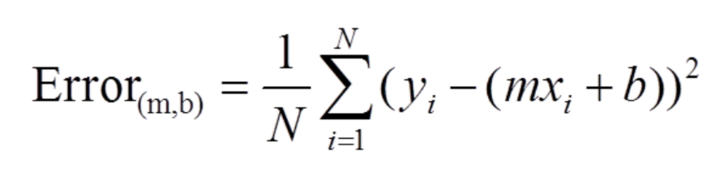

- 편미분 기법을 이용해, 최적의 a,b(weight)를 찾아냄 / 미분 -> 특정함수의 기울기를 계산
- 실제값과 예측값의 차이가 최소 -> 각 가중치(Weight, a/b)값에 대한 편미분의 결과가 0되는 지
- 여기서 계산되는 함수를 Cost Function (비용함수, 손실 함수 loss function) 라고 부름

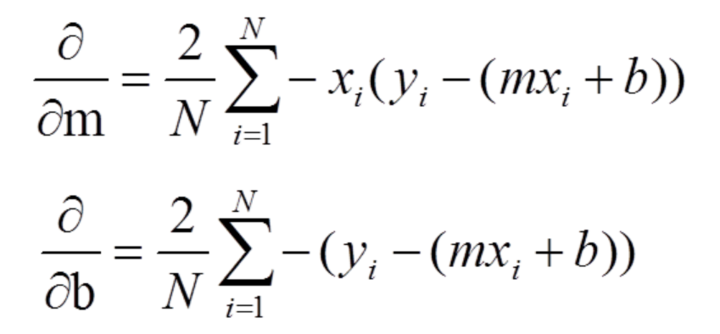


### 경사 하강법 (Gradient Descent)

- 점진적인 반복 계산을 통해, 함수가 최소가 되는 파라미터(Weight, 계수)를 찾는 방법 / 최소화 문제
- Gradient : 함수가 증가/감소 하는 방향과 크기를 표현
- Y = aX + b / 적절한 a,와 b를 도출하기 위해, 실제값과 예측값의 차이(비용함수)의 편미분을 반복적으로 계산
  - 초기에 임의의 a,b 선택 (무작위)
  - 함수값(비용함수 , 실제값과 예측값의 차이)이 줄어드는 방향으로 반복 계산
  - 학습율 (Learning Rate) : 얼마나 점진적으로 파라미터를 변경할 것인지

**경사 하강법 절차**

1. Weight를 임의의 값으로 설정하고, 첫 비용함수를 계산
2. 기존의 Weight값을 Update 후 (얼만큼 Update 할 것인가 - Learning Rate), 다시 비용함수를 계산
3. 비용함수가 증가했는지, 감소했는지 판단
    - 감소했다면, 1/2/3 반복하면 더 이상 비용함수가 변하지 않을 때 까지 계산
- 선형 회귀 알고리즘 (Linear Regression) : 최소제곱법 + 경사하강법


In [1]:
import numpy as np

# Scikit Learn에서 Linear Regression Model이 구현되어 있는 Source Code 
# Y = W1*X + W0  (W1, W0 - Weight)

# W1과 W0를 Update 할 값을 계산 
def get_weight_update(w1, w0, x, y, learning_rate=0.01):
    # 전체 데이터의 갯수를 계산 
    N = len(y)
    # 가중치를 얼마나 바꿀 것인지, w1_update / w0_update 변수로 각각 0 값을 넣어 선언 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)  # np.zeros_like : 모든 행렬에 0 값을 채워넣는 함수 

    # 실제값과 예측값의 차이 계산 
    y_pred = np.dot(x, w1.T) + w0  # y = w1 X + w0
    diff = y - y_pred # 실제값과 예측값의 차이 

    # w0_update값을 dot 행렬 연산으로 계산하기 위해, 행렬 내 1값으로 채운 변수 생성
    w0_factors = np.ones((N,1)) 

    # w1과 w0를 Update할 w1_update와 w0_update 계산 
    w1_update = -(2/N)*learning_rate*( np.dot(x.T, diff) )
    w0_update = -(2/N)*learning_rate*( np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [2]:
# 특정 횟수에 걸쳐 반복적으로 w1과 w0를 Update
#  iters= : 경사 하강법 반복 횟수 (Hyper parameter)
def gradient_descent_steps(x,y, iters=100):
    # w1 과 w0을 모두 0으로 초기화 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for i in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0 

In [3]:
# 평가 지표 계산 함수 구성 
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum( np.square(y-y_pred) )/N
    return cost 

In [4]:
import pandas as pd 

df1 = pd.read_csv('data/12_Data.csv')
print(df1.shape)

(569, 32)


In [5]:
# values.reshape(-1,1) : 시리즈 형태로 구성된 자료를 이중 배열로 변환 (앞서 만든 함수에 넣기 위해)
X = df1['Mean Concavity'].values.reshape(-1,1)
Y = df1['Mean Radius'].values.reshape(-1,1)

In [6]:
# Y (Mean Radius) = W1 x (Mean Concavity) + W0 
W1, W0 = gradient_descent_steps(X,Y, 100000)
print(W1, W0)

[[29.9156893]] [[11.47088767]]


In [7]:
# 회귀식 계산 
y_pred = W1[0,0] * X + W0
y_pred

array([[20.44858603],
       [14.07056107],
       [17.37624474],
       [18.69253507],
       [17.39419415],
       [16.19158344],
       [14.84238585],
       [14.27279113],
       [17.03221431],
       [18.27072385],
       [12.45780626],
       [14.44869538],
       [17.64847751],
       [14.44390887],
       [17.83694635],
       [16.37406915],
       [13.68315289],
       [16.62236937],
       [15.89541812],
       [13.4644692 ],
       [12.83743636],
       [12.35519544],
       [17.68437634],
       [14.75263879],
       [16.03303029],
       [18.13909481],
       [15.73387339],
       [15.92832537],
       [16.50569818],
       [14.42506199],
       [18.40833602],
       [15.11461863],
       [18.70150977],
       [16.42791739],
       [15.521472  ],
       [15.50352259],
       [15.41676709],
       [12.23732763],
       [12.1882659 ],
       [14.65092544],
       [12.40126561],
       [14.59408563],
       [17.7741234 ],
       [14.41668559],
       [13.94162445],
       [17

In [8]:
get_cost(Y, y_pred)

np.float64(6.718591566333503)

## 확률적 경사 하강법 (Stochastic Gradient Descent)
- 경사하강법은 모든 데이터에 대해 반복적으로 비용함수를 계산하여 가중치를 계산하므로 시간이 오래 걸림
- 전체데이터가 아닌 일부데이터만 추출하여, Weight Update (좀 더 단축된 시간)
- Batch : Random하게 Update에 사용할 데이터를 추출

In [9]:
def stochastic_gardient_descent_step(x, y, batch_size=100, iters=100):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for i in range(iters):
        # 전체 데이터에서 Random하게 Batch Size 만큼 데이터를 추출
        np.random.seed(i) # Random State 무작위 추출의 규칙 부여 -> 매 반복마다 다른 데이터셋 구성 
        
        # 전체 X데이터에서 Random 하게 번호를 부여  
        random_index = np.random.permutation(x.shape[0])
        sample_x = x[random_index[0:batch_size]]
        sample_y = y[random_index[0:batch_size]]
        w1_update, w0_update = get_weight_update(w1,w0,sample_x,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0 

In [10]:
W1, W0 = stochastic_gardient_descent_step(X,Y, iters=100000)

In [11]:
# 예측값 계산 및 비용함수 확인 
y_pred = W1[0,0] * X + W0

In [12]:
get_cost(Y,y_pred)

np.float64(6.718619212303113)

In [13]:
from sklearn.linear_model import LinearRegression

LinearRegression().fit(X,Y)

LinearRegression()

**다중 회귀 분석**

- X가 여러 항인 형태의 회귀 분석 모형

In [14]:
# 'Mean' 이름이 포함된 항목들만 추출 
name_list = [x for x in df1.columns if 'Mean' in x]

In [15]:
Y = df1[name_list[0]] # Mean Radius 값을 Y 
X = df1[name_list[1:]] #  Mean Radius 제외한 나머지 데이터를 X로 선언 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)
# Test Set : 학습에 참여하지 않는 데이터 
# Validation Set : 교차 검증 시, 학습 데이터 외 평가를 수행하는 데이터 (학습에 참여)
############################################################################
# Batch Set : 알고리즘 최적화에 있어서, 
#          (확률적 경사하강법에서) 데이터를 반복적으로 추출하여 파라미터를 찾을 때 사용하는 데이터


In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# 가중치 (회귀 계수) 확인
df_coef = pd.DataFrame()
df_coef['coef'] = model.coef_
df_coef['X_Columns'] = X.columns

In [19]:
df_coef.sort_values(by='coef')
# 회귀 계수는 Y에 얼마나 영향을 주는지 확인하는 지표 
# 회귀 계수가 클수록 Y가 X에 비례하게 증가/감소 
# 다중회귀분석에서 유의할 점은 각 X들의 Scale이 모두 다름 -> 스케일링 사용 

,coef,X_Columns
4,-4.592288,Mean Compactness
6,-0.978927,Mean Concave Points
5,-0.608739,Mean Concavity
2,-0.000500,Mean Texture
1,-0.000112,Mean Area
0,0.154758,Mean Perimeter
7,0.345536,Mean Symmetry
3,1.374016,Mean Smoothness
8,2.319796,Mean Fractal Dim


In [20]:
# 절편 확인 
model.intercept_

np.float64(0.21646428651994754)

In [21]:
# 평가 (결정계수 R2 / MSE)  // 실제값과 예측값을 비교  
# 평가가 유의미해야, 선형 회귀분석에서 회귀 계수값들이 유의미하다고 판단할 수 있음 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Y_train_pred = model.predict(X_train) # 학습 데이터 예측값 계산 
Y_test_pred  = model.predict(X_test) # 검증 데이터 예측값 계산 
print('학습 성능 R2 : ', r2_score(Y_train, Y_train_pred))
print('검증 성능 R2 : ', r2_score(Y_test,   Y_test_pred))
print('학습 성능 MSE : ', mean_squared_error(Y_train, Y_train_pred))
print('검증 성능 MSE : ', mean_squared_error(Y_test,   Y_test_pred))

학습 성능 R2 :  0.9994264098393587
검증 성능 R2 :  0.9992242922529492
학습 성능 MSE :  0.00719471050863637
검증 성능 MSE :  0.009333966044031637


## 다항 회귀 분석 (Polynominal Regression)
- 기존 선형회귀분석 : Y와 X간 관계가 일차방정식인 형태
- 다항회귀분석 다차원(다항식) X를 이용햐 2차,3차 방정식 형태로 표현되는 회귀식
- 적은 X 갯수를 이용해 성능 향상 / 각 X간 교호작용에 대한 효과를 회귀계수로 계산
- 다항회귀분석은 비선형회귀가 아닌 선형 회귀 분석의 종류 (최소제곱법 / 경사하강법)
- 특성공학을 활용해, X 값들의 다항항 생성한 뒤, 학습을 수행

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from imblearn.pipeline import make_pipeline

X_train.columns # 현재 X에는 9개의 항목이 존재 
# Multiple Regression (다중회귀) : 회귀식의 항이 9개 (+1 절편)
# Polynomial Regression (다항회귀) : 항의 차수에 따라서 항의 개수가 증가 

Index(['Mean Perimeter', 'Mean Area', 'Mean Texture', 'Mean Smoothness',
       'Mean Compactness', 'Mean Concavity', 'Mean Concave Points',
       'Mean Symmetry', 'Mean Fractal Dim'],
      dtype='object')

In [23]:
result = PolynomialFeatures(degree=2).fit_transform(X_train)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,55.27,234.3,16.84,0.10,0.07428,0.00000,0.0000,0.1985,0.07098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039402,0.014090,0.005038
1,1.0,72.49,399.8,17.57,0.09,0.05313,0.02783,0.0210,0.1601,0.05913,...,0.000775,0.000584,0.004456,0.001646,0.000441,0.003362,0.001242,0.025632,0.009467,0.003496
2,1.0,96.85,678.1,17.57,0.12,0.13050,0.15390,0.0862,0.1957,0.06216,...,0.023685,0.013266,0.030118,0.009566,0.007430,0.016869,0.005358,0.038298,0.012165,0.003864
3,1.0,111.00,933.1,23.06,0.09,0.06290,0.02891,0.0284,0.1564,0.05307,...,0.000836,0.000821,0.004522,0.001534,0.000807,0.004442,0.001507,0.024461,0.008300,0.002816
4,1.0,71.25,366.5,17.12,0.12,0.10710,0.04063,0.0427,0.1954,0.07976,...,0.001651,0.001735,0.007939,0.003241,0.001823,0.008344,0.003406,0.038181,0.015585,0.006362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,88.99,587.4,15.18,0.10,0.07688,0.04479,0.0371,0.2110,0.05853,...,0.002006,0.001662,0.009451,0.002622,0.001376,0.007828,0.002171,0.044521,0.012350,0.003426
394,1.0,141.30,1386.0,15.10,0.10,0.15150,0.19320,0.1255,0.1973,0.06183,...,0.037326,0.024247,0.038118,0.011946,0.015750,0.024761,0.007760,0.038927,0.012199,0.003823
395,1.0,81.09,481.9,18.60,0.10,0.10580,0.08005,0.0382,0.1925,0.06373,...,0.006408,0.003058,0.015410,0.005102,0.001459,0.007353,0.002434,0.037056,0.012268,0.004062
396,1.0,120.30,1033.0,18.70,0.11,0.14850,0.17720,0.1060,0.2092,0.06310,...,0.031400,0.018783,0.037070,0.011181,0.011236,0.022175,0.006689,0.043765,0.013201,0.003982


In [24]:
model_pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [25]:
model_pipe['linearregression'].coef_

array([ 5.49185496e-04,  1.59653960e-01,  2.06192186e-04,  8.84885559e-02,
       -4.96844344e+00,  3.47897460e+00, -5.35452513e+00,  1.04001413e+01,
        1.88815086e+00,  3.04192439e+01,  2.02409483e-04, -3.14665125e-05,
       -1.28832891e-03,  1.20442988e-01, -2.36776484e-01,  6.10604434e-03,
        4.55156128e-02, -5.16597435e-02, -1.42707347e-02,  7.98431829e-07,
        9.46210827e-05, -9.44364508e-03,  1.41472677e-02, -6.92942150e-04,
       -3.24922812e-03,  5.03255875e-03,  3.00024486e-03, -2.17934221e-04,
        9.89297255e-02,  4.18481112e-02,  1.42814108e-01, -3.41264212e-01,
        3.19339705e-02, -6.18244565e-01, -6.91901136e+01,  5.86250179e+01,
       -3.65868655e+01,  5.95316639e+01, -3.23279941e-01,  1.13023960e+02,
        2.05418250e+01, -8.41496288e+00, -1.22309744e+01,  8.16953420e+00,
       -8.23291061e+01,  3.27034506e-01,  8.16932159e+00,  1.82311891e+00,
        8.36388616e+01, -3.22951317e+00, -1.91728478e+01, -1.20118209e+02,
        2.33751015e+00, -

In [26]:
model_pipe['linearregression'].intercept_

np.float64(-1.5796435386511494)

In [27]:
# 성능 평가 
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred  = model_pipe.predict(X_test)

In [28]:
print('학습 성능 R2 : ', r2_score(Y_train, Y_train_pred))
print('검증 성능 R2 : ', r2_score(Y_test,   Y_test_pred))
print('학습 성능 MSE : ', mean_squared_error(Y_train, Y_train_pred))
print('검증 성능 MSE : ', mean_squared_error(Y_test,   Y_test_pred))

학습 성능 R2 :  0.9997484041222483
검증 성능 R2 :  0.9988471400661035
학습 성능 MSE :  0.003155841277971529
검증 성능 MSE :  0.01387217739854431


## Bias - Variance Trede off
- X가 여러항으로 나눠지는 다항회귀의 차수(Degree)가 높아질 수록 Train Set에 학습이 집중되어 Test환경에서는 예측 성능이 떨어지는 현상 (회귀모델)
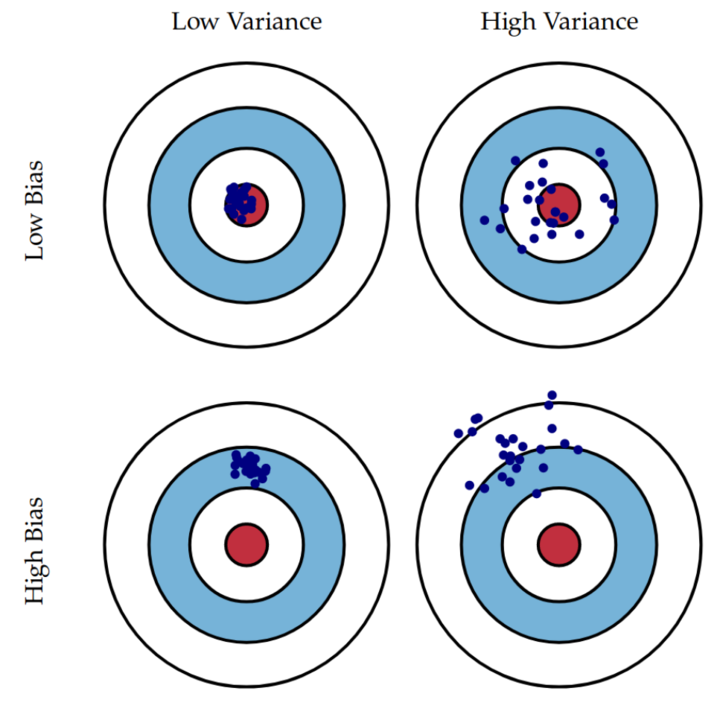

- 편향 (Bias) : 모델의 예측값이 실제값과 얼마나 차이가 발생하는지의 지표
    - 데이터를 모델이 얼마나 잘 예측하는지
- 분산 (Variance) : 훈련 데이터가 바뀔때, 모델의 예측이 얼마나 달라지는가에 대한 지표
    - 데이터에 모델이 얼마나 민감하게 반응하는지
- 저편향 / 저분산 (Low Bias / Low Variance) : 예측 결과가 실제 결과에 매우 일치하면서, 예측에 대한 변동(일반화 성능)이 크지 않는 경우

- 저편향 / 고분산 (Low Bias / High Variance) : 예측 결과가 실제 결과에 근접하지만, 예측 변동이 커지는 상황 (Overfitting)

    - X의 차수가 높아질 수록 많이 발생
    - degree 차수를 높이게 되면, 고분산 경향
- 고편향 / 저분산 (High Bias / Low Variance) : 예측 결과가 실제 결과에는 벗어나지만, 예측이 특정 부분에 집중되면서, 예측 변동은 줄어드는 상황 (Underfitting)

- 고편향 / 고분산 (High Bias / High Variance) : 예측도 잘 못하고, 예측의 변동도 큰 상황

- Bias - Variance Trade off : 분산이 높아지면, 편향이 떨어지고, 편향이 높아지면 분산이 떨어지는 현상이 관측

## 규제 선형 회귀 모델 (Regularization Regression)
- 회귀 모델에서 X항의 개수(또는 Degree 차수)에 따라서 Bias값과 Variance 값의 적절한 값을 찾는것이 중요
- 오차를 최소화 하면서도, 회귀 계수의 크기를 적절하게 조절한다면, 이 문제를 해결할 것이라고 판단
- Cost Function : Min(RSS) + alpha|W|
- 규제(Regularization) : alpha 값으로 패널티를 부여(규제) 회귀 계수의 값을 감소시키거나 상쇄시켜 Overfitting(Low Bias / High Variance)현상을 방지하는 방법
    - L1 : Weight 절댓값에 대해 패널티를 부여
    - L2 : Weight 제곱값에 대해 패널티를 부여
- Lasso Regression
- 선형 회귀 식에, L1규제를 추가한 회귀 모델 / L1 규제를 추가하면 예측 영향력이 작은 (회귀 계수가 적은) X의 계수들을 0으로 만들어, 회귀 모델이 예측할 때, 해당 X값이 선택되지 않게 함
    - y = 10 X1 + 20 X2 + 0.0001 X3 ...
    - y = 10 X1 + 20 X2 + 0 X3 ...
    - 변수 선택법의 일종으로 사용하기도 함 (패널티 항에 의해 회귀 계수를 0으로 만들기 떄문에, 몇개의 변수를 남길 것인지 지정할 수는 없음)
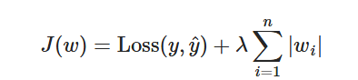
- Alpha (λ)는 규제의 강도를 조절하는 매개변수 (HyperParameter)

    - 높은 Alpha (λ)값은 모델의 회귀계수(가중치)를 더 많이 축소시키고, 일부 계수를 0으로 만들어, 남은 X 변수들을 선택하는 효과 (모델을 더욱 단순하게 만드는 효과)
    - 낮은 Alpha (λ)값은 모델이 학습에 있어서 더많은 데이터를 맞추는 효과, 과적합의 위험성은 여전히 남게 됨 (모델을 더 복잡하게 만드는 효과)
- X변수가 매우많을 때, 모델의 복잡도를 줄이기 위한 용도로 사요

- 중요변수들만 남기 때문에, 어떤 특성이 모델에 중요한 역할을 하는지 찾을 수 있음

In [29]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler
# Lasso 모델이 회귀계수값 자체가 낮은 X항을 제외시키기 때문에, X값의 스케일에 의해 회귀 계수를 제거
# Lasso 모델은 스케일링과 함께 사용 

In [30]:
model_pipe = make_pipeline(StandardScaler(), Lasso())
model_pipe.fit(X_train, Y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [31]:
model_pipe['lasso'].coef_

array([ 2.53387054,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ])

In [32]:
from sklearn.model_selection import GridSearchCV 

hyperparameter = {'lasso__alpha':[0.01, 0.05, 0.1, 1.0]}
grid_model = GridSearchCV(model_pipe, param_grid=hyperparameter,cv=3, scoring='r2')
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [33]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model['lasso'].coef_
df_coef['X'] = X.columns

In [34]:
df_coef

,Coef,X
0,3.610945,Mean Perimeter
1,0.022335,Mean Area
2,-0.000000,Mean Texture
3,0.000000,Mean Smoothness
4,-0.196395,Mean Compactness
5,-0.014056,Mean Concavity
6,-0.000000,Mean Concave Points
7,-0.000000,Mean Symmetry
8,-0.027855,Mean Fractal Dim


## Ridge Regression

- 선형 회귀 L2 규제를 추가한 회귀 모델 / L2규제는 상대적으로 큰 회귀 계수의 값을 감소시켜 고분산을 방지
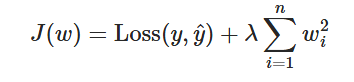
- 높은 Alpha(λ) : 모델의 회귀 계수를 더 많이 축소시켜, 복잡성을 줄임 (분산을 줄임)
- 낮은 Alpha(λ) : 모델의 회귀 계수를 덜 축소시켜 복잡성을 유지 (편향을 줄임)
- X 변수들 간의 상관관계가 높을 때 효과적

In [35]:
from sklearn.linear_model import Ridge

model_pipe2 = make_pipeline( StandardScaler(), Ridge())

In [36]:
hyperparameter = {'ridge__alpha':[0.01, 0.05, 0.1, 1.5]}
grid_model = GridSearchCV(model_pipe2, param_grid=hyperparameter, cv=3, scoring='r2')
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [37]:
best_model['ridge'].coef_

array([ 3.76560352e+00, -3.36117335e-02, -2.15155389e-03,  2.00363357e-02,
       -2.42258740e-01, -4.91347559e-02, -3.80300549e-02,  9.17912067e-03,
        1.51353434e-02])